In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split

In [81]:
df = pd.read_csv('/content/drive/MyDrive/NNFL-Assignment1/data_q2_q3.csv')
df.head()

,Feat1,Feat2,Feat3,Feat4,Output
0,0.195,0.025,1.5,4.97,2.2
1,0.195,0.025,2.0,4.97,2.2
2,0.195,0.025,3.0,4.97,2.2
3,0.195,0.025,4.0,4.97,2.2
4,0.195,0.125,1.5,4.97,2.2


In [82]:
df = df.drop_duplicates(keep='first')
df = df.sample(frac = 1).reset_index(drop=True)
m = df.shape[0]
n = df.shape[1] - 1
print(m, n)
df.head()

115 4


,Feat1,Feat2,Feat3,Feat4,Output
0,0.125,0.125,4.0,4.40,2.3
1,0.130,0.025,3.0,4.21,1.2
2,0.130,0.125,2.0,4.21,1.2
3,0.035,0.125,1.5,4.68,0.8
4,0.035,0.025,2.0,4.68,0.8


In [83]:
datan = df.values

X = datan[:, 0:4]
X = (X - np.min(X, axis = 0))/(np.max(X, axis=0)-np.min(X, axis=0))
X = np.append(np.ones([m,1]), X, axis = 1)

y = datan[:, -1]
y = (y - np.min(y, axis=0))/(np.max(y, axis=0)-np.min(y, axis=0))

w = np.zeros(n+1)

print(X.shape, y.shape)

(115, 5) (115,)


In [84]:
def plot_gd(costs):
  plt.title('Cost Function vs epochs')
  plt.xlabel('Iterations')
  plt.ylabel('Cost')
  plt.plot(costs)
  plt.show()

In [85]:
def cost(X,y,w,lm):
  m = len(y)
  h = np.dot(X, w.T)
  J = ((1/(2*m)) * np.sum((h - y) ** 2))+((lm/(2*m))* np.sum(abs(w)))
  return J

In [86]:
def bgd(X, y, w, alpha, T, lm):
  costs = np.zeros(T)
  weights = np.zeros((T,5))
  m = len(y)
  for i in range(T):
    h = np.dot(X, w.T)
    w = w - (alpha*lm/2)*(np.sign(w)) - (alpha/m) * np.dot(h - y, X)
    costs[i] = cost(X, y, w, lm)
    weights[i, :] = w
  return costs, weights, w
################################################
def sgd(X, y, w, alpha, T, lm):
    costs = np.zeros(T)
    weights = np.zeros((T,5))
    m = len(y)
    for i in range(T):
        rand_index = np.random.randint(m)
        ind_x = X[rand_index:rand_index+1]
        ind_y = y[rand_index:rand_index+1]
        w = w - (alpha*lm/2)*(np.sign(w)) - ((alpha/m) * (ind_x.T.dot(ind_x.dot(w) - ind_y)))
        costs[i] = cost(ind_x,ind_y,w, lm)
        weights[i, :] = w
    return costs, weights, w
################################################
def mbgd(X, y, w, alpha, T, batch_size, lm):
    costs = np.zeros(T)
    weights = np.zeros((T,5))
    m = len(y)
    for i in range(T):
        rand_index = np.random.randint(m)
        ind_x = X[rand_index:rand_index+batch_size]
        ind_y = y[rand_index:rand_index+batch_size]
        w = w - (alpha*lm/2)*(np.sign(w)) - (alpha/batch_size) * (ind_x.T.dot(ind_x.dot(w) - ind_y))
        costs[i] = cost(ind_x,ind_y,w, lm)
        weights[i, :] = w
    return costs, weights, w

In [87]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1)
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(82, 5) (10, 5) (23, 5) (82,) (10,) (23,)


In [88]:
alpha_vals = np.linspace(0.001, 1, 50).tolist()
lm_vals = np.linspace(0.001, 0.01, 50).tolist()

In [89]:
def grid_search_bgd(X_train, X_val, y_train, y_val, w, alpha_vals, T, lm_vals):
  e_min = math.inf
  alpha_best, lm_best = 0, 0
  for i in alpha_vals:
    for j in lm_vals:
      costs_bgd, weights_bgd, w_bgd = bgd(X_train, y_train, w, i, T, j)
      predictions = np.dot(X_val, w_bgd.T)
      mae = np.absolute(np.subtract(y_val, predictions)).mean()
      if(mae < e_min):
        e_min = mae
        alpha_best = i
        lm_best = j
  return alpha_best, lm_best

def grid_search_sgd(X_train, X_val, y_train, y_val, w, alpha_vals, T, lm_vals):
  e_min = math.inf
  alpha_best, lm_best = 0, 0
  for i in alpha_vals:
    for j in lm_vals:
      costs_sgd, weights_sgd, w_sgd = sgd(X_train, y_train, w, i, T, j)
      predictions = np.dot(X_val, w_sgd.T)
      mae = np.absolute(np.subtract(y_val, predictions)).mean()
      if(mae < e_min):
        e_min = mae
        alpha_best = i
        lm_best = j
  return alpha_best, lm_best

def grid_search_mbgd(X_train, X_val, y_train, y_val, w, alpha_vals, T, batch_size, lm_vals):
  e_min = math.inf
  alpha_best, lm_best = 0, 0
  for i in alpha_vals:
    for j in lm_vals:
      costs_mbgd, weights_mbgd, w_mbgd = mbgd(X_train, y_train, w, i, T, batch_size, j)
      predictions = np.dot(X_val, w_mbgd.T)
      mae = np.absolute(np.subtract(y_val, predictions)).mean()
      if(mae < e_min):
        e_min = mae
        alpha_best = i
        lm_best = j
  return alpha_best, lm_best


In [90]:
iterations = 500
alpha_best_bgd, lm_best_bgd = grid_search_bgd(X_train, X_val, y_train, y_val, w, alpha_vals, iterations, lm_vals)
costs_bgd, weights_bgd, w_bgd = bgd(X_train, y_train, w, alpha_best_bgd, iterations, lm_best_bgd)

alpha_best_sgd, lm_best_sgd = grid_search_sgd(X_train, X_val, y_train, y_val, w, alpha_vals, iterations, lm_vals)
costs_sgd, weights_sgd, w_sgd = sgd(X_train, y_train, w, alpha_best_sgd, iterations, lm_best_sgd)

alpha_best_mbgd, lm_best_mbgd = grid_search_mbgd(X_train, X_val, y_train, y_val, w, alpha_vals, iterations, 9, lm_vals)
costs_mbgd, weights_mbgd, w_mbgd = mbgd(X_train, y_train, w, alpha_best_mbgd, iterations, 5, lm_best_mbgd)

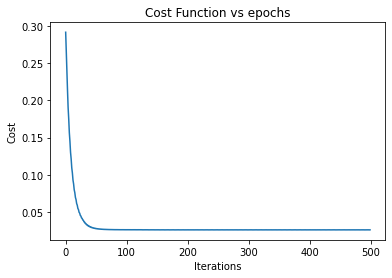

In [91]:
plot_gd(costs_bgd)

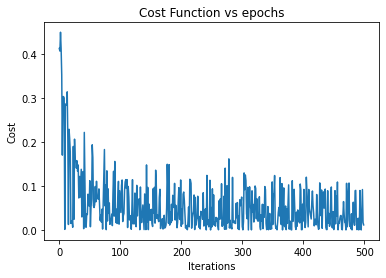

In [92]:
costs_sgd, weights_sgd, w_sgd = sgd(X_train, y_train, w, 1, iterations, 0.001)

plot_gd(costs_sgd)

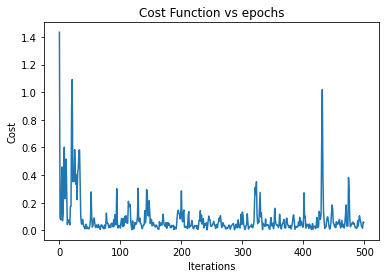

In [93]:
plot_gd(costs_mbgd)

In [94]:
pred_bgd = np.dot(X_test, w_bgd.T)
mae_bgd = np.absolute(np.subtract(y_test, pred_bgd)).mean()
mse_bgd = (np.subtract(y_test, pred_bgd)**2).mean()
df_bgd = pd.DataFrame([y_test,pred_bgd]).T
cc_bgd = df_bgd.corr()[1][0]

print("mean squared error for batch gradient descent: ", mse_bgd)
print("mean absolute error for batch gradient descent: ", mae_bgd)
print("correlation coeffecient error for batch gradient descent: ", cc_bgd)

mean squared error for batch gradient descent:  0.04614696872671057
mean absolute error for batch gradient descent:  0.17708162645342512
correlation coeffecient error for batch gradient descent:  0.7119797189932261


In [95]:
pred_sgd = np.dot(X_test, w_sgd.T)
mae_sgd = np.absolute(np.subtract(y_test, pred_sgd)).mean()
mse_sgd = (np.subtract(y_test, pred_sgd)**2).mean()
df_sgd = pd.DataFrame([y_test,pred_sgd]).T
cc_sgd = df_sgd.corr()[1][0]

print("mean squared error for stochastic gradient descent: ", mse_sgd)
print("mean absolute error for stochastic gradient descent: ", mae_sgd)
print("correlation coeffecient error for stochastic gradient descent: ", cc_sgd)

mean squared error for stochastic gradient descent:  0.051881989914918145
mean absolute error for stochastic gradient descent:  0.19384809218995633
correlation coeffecient error for stochastic gradient descent:  0.7162369096713519


In [96]:
pred_mbgd = np.dot(X_test, w_mbgd.T)
mae_mbgd = np.absolute(np.subtract(y_test, pred_mbgd)).mean()
mse_mbgd = (np.subtract(y_test, pred_mbgd)**2).mean()
df_mbgd = pd.DataFrame([y_test,pred_mbgd]).T
cc_mbgd = df_mbgd.corr()[1][0]

print("mean squared error for mini-batch gradient descent: ", mse_mbgd)
print("mean absolute error for mini-batch gradient descent: ", mae_mbgd)
print("correlation coeffecient error for mini-batcch gradient descent: ", cc_mbgd)

mean squared error for mini-batch gradient descent:  0.1451697808982012
mean absolute error for mini-batch gradient descent:  0.3082545076106351
correlation coeffecient error for mini-batcch gradient descent:  0.6148587772671701
